In [1]:
%load_ext autoreload
%autoreload 2
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pickle
import pdb

sys.path.append('..')

from postprocess import postprocess_dir
from utils import gen_covariance
from misc import calc_avg_cov, calc_clustering, get_cov_list

In [2]:
# Load data
with open('D:\\nse\\MIC.dat', 'rb') as f:
    uoil = pickle.load(f)
    lasso = pickle.load(f)
    en = pickle.load(f)

In [6]:
# Re-create cov list
# Re-create the list of cov_params:
n_features = 100

# Block sizes
block_sizes = [5, 10, 20]

# Block correlation
correlation = [0, 0.08891397, 0.15811388, 0.28117066, 0.5]

# Exponential length scales
L = [2, 5, 10, 20]

cov_list, _ = get_cov_list(n_features, 60, correlation, block_sizes, L, n_supplement = 15)

cov_params = [{'correlation' : t[0], 'block_size' : t[1], 'L' : t[2], 't': t[3]} for t in cov_list]

avg_cov = np.array([calc_avg_cov(100, **cov_param) for cov_param in cov_params])

In [7]:
# For each sparsity, iterate through all the unique cov_params and for UoILasso, iterate over the manual penalties and take the average over the repititions

sparsity = np.unique(uoil['sparsity'].values)
manual_penalties = np.unique(uoil['manual_penalty'].values)

sa = np.zeros((len(sparsity), len(cov_params), len(manual_penalties)))
fnr = np.zeros(sa.shape)
fpr = np.zeros(sa.shape)

alt_sa = np.zeros(sa.shape)
alt_fnr = np.zeros(fnr.shape)
alt_fpr = np.zeros(fpr.shape)

for i, s in enumerate(sparsity):
    for ii, cov_param in enumerate(cov_params):
        print('%d, %d' % (i, ii))
        d = uoil.loc[(uoil['sparsity'] == s) & (uoil['cov_params'] == cov_param)]
        for j, p in enumerate(manual_penalties): 
            dd = d.loc[d['manual_penalty'] == p]
            sa[i, ii, j] = np.mean([dd.iloc[k]['sa'] for k in range(dd.shape[0])])

            alt_sa[i, ii, j] = np.mean([dd.iloc[k]['alt_sa_results'] for k in range(dd.shape[0])])
    


0, 0
0, 1
0, 2
0, 3
0, 4
0, 5
0, 6
0, 7
0, 8


C:\Users\akumar\Anaconda3\envs\nse\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\akumar\Anaconda3\envs\nse\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0, 9
0, 10
0, 11
0, 12
0, 13
0, 14
0, 15
0, 16
0, 17
0, 18
0, 19
0, 20
0, 21
0, 22
0, 23
0, 24
0, 25
0, 26
0, 27
0, 28
0, 29
0, 30
0, 31
0, 32
0, 33
0, 34
0, 35
0, 36
0, 37
0, 38
0, 39
0, 40
0, 41
0, 42
0, 43
0, 44
0, 45
0, 46
0, 47
0, 48
0, 49
0, 50
0, 51
0, 52
0, 53
0, 54
0, 55
0, 56
0, 57
0, 58
0, 59
0, 60
0, 61
0, 62
0, 63
0, 64
0, 65
0, 66
0, 67
0, 68
0, 69
0, 70
0, 71
0, 72
0, 73
0, 74
1, 0
1, 1
1, 2
1, 3
1, 4
1, 5
1, 6
1, 7
1, 8
1, 9
1, 10
1, 11
1, 12
1, 13
1, 14
1, 15
1, 16
1, 17
1, 18
1, 19
1, 20
1, 21
1, 22
1, 23
1, 24
1, 25
1, 26
1, 27
1, 28
1, 29
1, 30
1, 31
1, 32
1, 33
1, 34
1, 35
1, 36
1, 37
1, 38
1, 39
1, 40
1, 41
1, 42
1, 43
1, 44
1, 45
1, 46
1, 47
1, 48
1, 49
1, 50
1, 51
1, 52
1, 53
1, 54
1, 55
1, 56
1, 57
1, 58
1, 59
1, 60
1, 61
1, 62
1, 63
1, 64
1, 65
1, 66
1, 67
1, 68
1, 69
1, 70
1, 71
1, 72
1, 73
1, 74
2, 0
2, 1
2, 2
2, 3
2, 4
2, 5
2, 6
2, 7
2, 8
2, 9
2, 10
2, 11
2, 12
2, 13
2, 14
2, 15
2, 16
2, 17
2, 18
2, 19
2, 20
2, 21
2, 22
2, 23
2, 24
2, 25
2, 26
2, 27
2, 28
2

In [11]:
manual_penalties

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

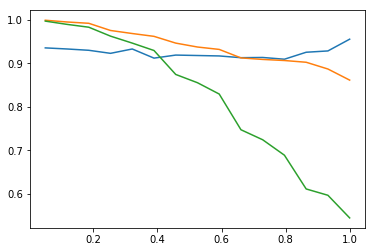

In [13]:
plt.plot(sparsity, np.max(sa[:, 5, :], axis = 1))
plt.plot(sparsity, np.max(alt_sa[:, 5, :], axis = 1))

plt.plot(sparsity, alt_sa[:, 5, 19])